# Hypothesis Testing

In [1]:
import numpy as np
import pandas as pd
import math
import statistics
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Question 1

Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

Step-1: Alternate Hypothesis (Bold Claim):$$H_{1}: \mu\neq 500$$
         Null Hypothesis (Status Quo):$$H_{0}: \mu = 500$$

Step-2:

* Collect a sample size n=10$$[490,220,470,500,495,496,496,498,508,480]$$
* Compute the sample mean$$\overline{x}=465.3$$

Step-3: Compute Test statistics       $$t=\frac{\overline{x}-\mu}{s/\sqrt{n}}$$

Step-4: Decide $\alpha$ or significance level= $0.95$

Step-5:Two tailed t-statistics                                            

step-6: Compute p-value

In [5]:
l=[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
sum(l)/len(l)

465.3

In [9]:
def standard_deviation(data):
    length=len(data)
    sum_of_data=sum(data)
    mean=sum_of_data/length
    sum_var=0
    for i in data:
        sum_square=(i-mean)**2
        sum_var+=sum_square
    return (sum_var/length)**0.5

def t_score(sample_mean,pop_mean,sample_std,sample_size):
    numerator=sample_mean-pop_mean
    denominator=sample_std/sample_size**0.5
    return numerator/denominator

In [10]:
#Two Tail - Calculating the z-critical vaue

confidence_level=0.95
alpha=1-confidence_level
t_critical=t.ppf(1-alpha/2,df=9)
print(t_critical)

2.2621571627409915


In [11]:
#Calculating the sample standard deviation
standard_deviation(l)

82.3918078451978

In [12]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = 82.3918078451978

In [13]:
#Calculating the t-score

t=t_score(sample_mean,pop_mean,sample_std,sample_size)
print(t)

-1.3318197242863192


Text(465.3, 0.0007, 'x_bar')

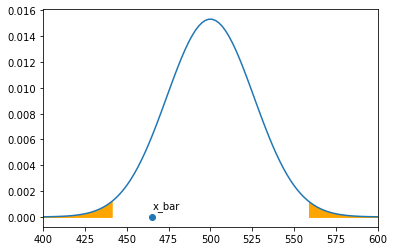

In [14]:
#Plotting the sampling distributions with rejection regions

x_min=400
x_max=600

mean=pop_mean
std=sample_std/sample_size**0.5

# Ploting the graph and setting the x limits
x=np.linspace(x_min,x_max,100)
y=norm.pdf(x,mean,std)
plt.xlim(x_min,x_max)
plt.plot(x,y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [15]:
# Conclusion using t test

if(np.abs(t)>t_critical):
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Fail to reject the Null Hypothesis


In [16]:
# Conclusion using p test

p_value= 2*(1.0-norm.cdf(np.abs(t)))
print("p_value=",p_value)

if(p_value<alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value= 0.18291943486353945
Fail to reject Null Hypothesis


# Question 2

You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? 

Step-1: Alternate Hypothesis (Bold Claim):        $$H_{1}: \mu \gt 4$$
        Null Hypothesis (Status Quo):              $$H_{0}: \mu  \leq 4$$

Step-2:

Collect a sample size n=20                         $$[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]$$
Compute the sample mean                            $$\overline{x}=4.25$$
Step-3: Compute Test statistics                    $$t=\frac{\overline{x}-\mu}{s/\sqrt{n}}$$

Step-4: Decide $\alpha$ or significance level= $0.95$

Step-5:Rigth tailed t-statistics

step-6:Compute p-value

In [18]:
l2=[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
print(len(l2))
sum(l2)/len(l2)

20


4.25

In [19]:
#Right tail test- Calculating the t-critical value

from scipy.stats import t

confidence_leve_2=0.95
alpha_2=1-confidence_leve_2
t_critical_2=t.ppf(1-alpha_2, df = 9)
print(t_critical_2)

1.8331129326536335


In [21]:
standard_deviation(l2)

0.82915619758885

In [22]:
# Defining the sample and population parameters

sample_size_2 = 20
sample_mean_2 = 4.25
pop_mean_2 = 4
sample_std_2 = 0.82915619758885

In [24]:
#Calculating the t-score

t_2=t_score(sample_mean_2,pop_mean_2,sample_std_2,sample_size_2)
print(t_2)

1.3483997249264843


Text(4.25, 0.1, 'x_bar')

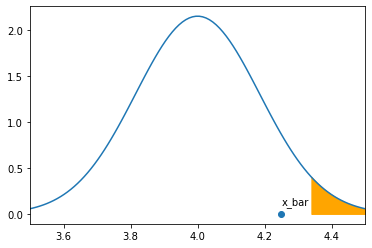

In [25]:
#Plotting the sampling distributions with rejection regions

x_min_2=3.5
x_max_2=4.5

#Defining the sampling distribution mean and sampling distribution std
mean_2=pop_mean_2
std_2=sample_std_2/(sample_size_2**0.5)

#Plotting the graph and setting the x limits
x_2=np.linspace(x_min_2,x_max_2,100)
y_2=norm.pdf(x_2,mean_2,std_2)
plt.xlim(x_min_2,x_max_2)
plt.plot(x_2,y_2)

#Computing the critical right value(Right tailed test)
t_critical_right_2=pop_mean_2+(t_critical_2*std_2)

#Shading the right rejection region
x2=np.linspace(t_critical_right_2,x_max_2,100)
y2=norm.pdf(x2,mean_2,std_2)
plt.fill_between(x2,y2,color='orange')

#Plotting the sample mean and concuding the results
plt.scatter(sample_mean_2,0)
plt.annotate("x_bar",(sample_mean_2,0.1))

#In this case the sample mean does not fall in the rejection region
#i.e. here we fail to reject he null hypothesis

In [26]:
#Concusion using t test

if(t_2 > t_critical_2):
    print("Reject the Null Hypotehsis")
else:
    print("Fail to reject the Null Hypothesis")

Fail to reject the Null Hypothesis


In [27]:
# Conclusion using p test

p_value_2 = 1.0 - norm.cdf(np.abs(t_2))

print("p_value = ", p_value_2)

if(p_value_2 < alpha_2):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.08876492620607679
Fail to reject Null Hypothesis


# Question 3

TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? 

Step-1: Alternate Hypothesis (Bold Claim):$$H_{1}: \mu \gt; 15$$
Null Hypothesis (Status Quo):$$H_{0}: \mu  \leq 15$$

Step-2:

Collect a sample size n=20$$[14.8,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.4,15.46,13.88,14.31,14.41,15.7,15.38]$$
Compute the sample mean$$\overline{x}=15.130499999999998$$
Step-3: Compute Test statistics$$t=\frac{\overline{x}-\mu}{s/\sqrt{n}}$$

Step-4: Decide $\alpha$ or significance level= $0.95$

Step-5:Rigth tailed t-statistics

Step-6: Compute p-value

In [29]:
l_3=[14.8,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.4,15.46,13.88,14.31,14.41,15.7,15.38]
sum(l_3)/len(l_3)

15.130499999999998

In [30]:
# Right tail test

confidence_leve_3=0.95
alpha_3=1-confidence_leve_3
t_critical_3=t.ppf(1-alpha_3,df=19)
print(t_critical_3)

1.729132811521367


In [31]:
standard_deviation(l_3)

0.9724375301272571

In [33]:
sample_size_3=20
sample_mean_3=15.130499999999998
pop_mean_3=15
sample_std_3=0.9724375301272571

In [34]:
t_3=t_score(sample_mean_3,pop_mean_3,sample_std_3,sample_size_3)
print(t_3)

0.6001555102990127


Text(15.130499999999998, 0.1, 'x_bar')

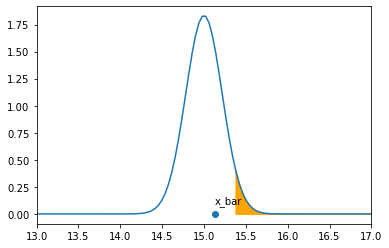

In [35]:
#Plotting the graph-

x_min_3=13
x_max_3=17

mean_3=pop_mean_3
std_3=sample_std_3/(sample_size_3**0.5)

x_3=np.linspace(x_min_3,x_max_3,100)
y_3=norm.pdf(x_3,mean_3,std_3)

plt.xlim(x_min_3,x_max_3)
plt.plot(x_3,y_3)

t_critical_right_3=pop_mean_3+(t_critical_3*std_3)

x3=np.linspace(t_critical_right_3,x_max_3,100)
y3=norm.pdf(x3,mean_3,std_3)
plt.fill_between(x3,y3,color='orange')

plt.scatter(sample_mean_3,0)
plt.annotate("x_bar",(sample_mean_3,0.1))

In [36]:
if (t_3> t_critical_3):
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Fail to reject the Null Hypothesis


In [37]:
p_value_3 = 1.0 - norm.cdf(np.abs(t_3))

print("p_value = ", p_value_3)

if(p_value_3 < alpha_3):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.27420130031012957
Fail to reject Null Hypothesis


# Question 4

In [38]:
You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

Object `claim` not found.


Step-1: Alternate Hypothesis (Bold Claim) :$$H_{1}: \mu \lt 100$$

Null Hypothesis (Status Quo):$$H_{0}: \mu  \geq 100$$

Step-2:

Collect a sample size n=100
Compute the sample mean$$\overline{x}=99.25$$
Step-3: Compute Test statistics$$t=\frac{\overline{x}-\mu}{s/\sqrt{n}}$$

Step-4: Decide $\alpha$ or significance level= $0.99$

Step-5:Rigth tailed t-statistics

step-6: Compute p-value

In [41]:
from numpy import random
x=random.randint(95,105, size=(100))
l_4=list(x)
l_4[:20]

[101,
 104,
 96,
 101,
 103,
 103,
 100,
 97,
 99,
 98,
 100,
 97,
 103,
 103,
 104,
 103,
 103,
 104,
 102,
 99]

In [42]:
sum(l_4)/len(l_4)

99.78

In [50]:
#Left tail test

confidence_leve_4=0.99
alpha_4=1-confidence_leve_4
t_critical_4=t.ppf(1-alpha_4,df=99)
print(t_critical_4)

2.3646058614359737


In [44]:
standard_deviation(l_4)

2.7697653330201097

In [45]:
sample_size_4=100
sample_mean_4=99.25
pop_mean_4=100
sample_std_4=2.7472713735632306

In [46]:
t_4=t_score(sample_mean_4,pop_mean_4,sample_std_4,sample_size_4)
print(t_4)

-2.729981490788239


Text(99.25, 0.02, 'x_bar')

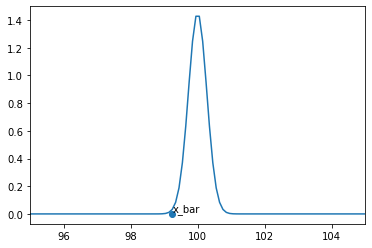

In [47]:
#Plotting the graph

x_min_4=95
x_max_4=105

mean_4=pop_mean_4
std_4=sample_std_4/(sample_size_4**0.5)

x4=np.linspace(x_min_4,x_max_4,100)
y4=norm.pdf(x4,mean_4,std_4)

plt.xlim(x_min_4,x_max_4)
plt.plot(x4,y4)

t_critical_left_4=pop_mean_4+(-t_critical_4*std)

x4=np.linspace(x_min_4,t_critical_left_4,100)
y4=norm.pdf(x4,mean_4,std_4)
plt.fill_between(x4,y4,color='orange')

plt.scatter(sample_mean_4,0)
plt.annotate("x_bar",(sample_mean_4,0.02))

In [48]:
if(t_4<t_critical_4):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Reject Null Hypothesis


In [49]:
p_value_4=1.0-norm.cdf(np.abs(t_4))
print("p_value= ",p_value_4)
if(p_value_4<alpha_4):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value=  0.00316689407757631
Reject Null Hypothesis
